# LHC Filling Pattern from CALS data

Info on the filling pattern for a fill
- decode filling scheme with various functions
- do some plots

In [26]:
import sys
sys.path.append('/eos/user/e/efthymio/Projects/LHCTools/LHCTools/')
from importlib import reload
if ('fpattern') in dir():
    reload(fpattern)
else:
    import LHC_FillingPattern as fpattern
print (fpattern.version)

3.02 - April 27, 2020 (IE)


In [2]:
# import LHCTools as ltools
# from LHCTools import LHC_FillingPattern

import cl2pd
from cl2pd import importData
pd=importData.pd     #is the pandas package

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [3]:
fno = 7334

## LHC Filling Scheme info from LPC web

In [ ]:
ltools.my_cool_test_method()

In [17]:
lhcfpattern = fpattern.LHCFillingPattern(fno)
lhcfpattern.info()

 Bunch spacing b_h_dist =  3.740022895622896  [m]
 Max No possible nominal LL encounters :  38 
>>>>> LHC Filling pattern for fil 7334
name ______________________________ 25ns_2556b_2544_2215_2332_144bpi_20injV3
bunch spacing _____________________ 25
bunches ___________________________ 2556
bunches at IP1/5 __________________ 2544
bunches at IP2 ____________________ 2215
bunches at IP8 ____________________ 2332
bunches per injection _____________ 144
no of injections __________________ 20


In [18]:
filledBunchesDF = lhcfpattern.setBunchPatternAtMode('STABLE',pd.Timedelta('0s'))
#filledBunchesDF = LHC_FillingPattern.getFilledBunches(fno, 'STABLE', pd.Timedelta('0s'))
filledBunchesDF.head()

,LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN,LHC.BCTFR.A6R4.B2:BUNCH_FILL_PATTERN,fill,mode,nobunches_b1,nobunches_b2,fpatt_b1,fpatt_b2,bid_b1,bid_b2
2018-10-23 14:36:56.848999977+00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...",7334,STABLE,2556.0,2556.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 6..."


In [19]:
bid_b1 = filledBunchesDF['bid_b1'].values[0]
bid_b2 = filledBunchesDF['bid_b2'].values[0]
print ('Filled slots @ SB : ',len(bid_b1),len(bid_b2))
print ('Beam 1 : ', bid_b1)
print ('Beam 2 : ', bid_b2)

Filled slots @ SB :  2556 2556
Beam 1 :  [  18   19   20 ... 3410 3411 3412]
Beam 2 :  [   6    7    8 ... 3410 3411 3412]


In [20]:
bpat_b1 = filledBunchesDF['fpatt_b1'].values[0]
bpat_b2 = filledBunchesDF['fpatt_b2'].values[0]
print (f'Filled slots @ SB : {np.sum(bpat_b1)} ,{np.sum(bpat_b2)}')
print (f'Beam 1 : {bpat_b1}')
print (f'Beam 2 : {bpat_b2}')

Filled slots @ SB : 2556.0 ,2556.0
Beam 1 : [0. 0. 0. ... 0. 0. 0.]
Beam 2 : [0. 0. 0. ... 0. 0. 0.]


In [21]:
print ('>>> Bunch spacing:')
print (f''' \t B1 : \n in Bxing: {np.diff(bid_b1)} , \n in ns   : {np.diff(bid_b1)*25} [ns] ''')
print (f''' \t B2 : \n in Bxing: {np.diff(bid_b2)} , \n in ns   : {np.diff(bid_b2)*25} [ns] ''')

>>> Bunch spacing:
 	 B1 : 
 in Bxing: [1 1 1 ... 1 1 1] , 
 in ns   : [25 25 25 ... 25 25 25] [ns] 
 	 B2 : 
 in Bxing: [1 1 1 ... 1 1 1] , 
 in ns   : [25 25 25 ... 25 25 25] [ns] 


In [23]:
# bunchTrains = LHC_FillingPattern.setBunchTrains()
bunchTrainsDF = lhcfpattern.setBunchTrains()
bunchTrainsDF.head()

,id,bid_first,bid_last,bids,nbunches,gap,beam
0,0,18,29,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]",12,170,b1
1,1,61,108,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...",48,32,b1
2,2,116,163,"[116, 117, 118, 119, 120, 121, 122, 123, 124, ...",48,8,b1
3,3,195,242,"[195, 196, 197, 198, 199, 200, 201, 202, 203, ...",48,32,b1
4,4,250,297,"[250, 251, 252, 253, 254, 255, 256, 257, 258, ...",48,8,b1


## Get the long range encounters at all IPs

In [24]:
# -- TAN position: S_start = 140.25m, S_middle = 142.75m, S_end = 144.5m
HRF400 = 35640
LHCLENGTH  = 26658.8832
b_t_dist = 25
b_h_dist = LHCLENGTH/HRF400 * 10./2. * b_t_dist / 25.;
print (' Bunch spacing b_h_dist = ', b_h_dist, ' [m]')
S_TAN_end = 144.5
nmax = int(S_TAN_end/b_h_dist)
print (' Max No possible nominal LL encounters : ',nmax, '')

 Bunch spacing b_h_dist =  3.740022895622896  [m]
 Max No possible nominal LL encounters :  38 


In [27]:
lrencountersDF = lhcfpattern.setLongRangeEncounters(nmax)

In [28]:
lrencountersDF.head()

,bid,beam,hoip1,lrip1enc,lrip1enc_pos,lrip1enc_no,hoip2,lrip2enc,lrip2enc_pos,lrip2enc_no,hoip5,lrip5enc,lrip5enc_pos,lrip5enc_no,hoip8,lrip8enc,lrip8enc_pos,lrip8enc_no
0,18,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, ...",46,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -32, 1, 2, 3, 4, 5, ...",43
1,19,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",12,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -33, -1, 1, 2, 3, 4, 5, 6...",43
2,20,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14, -13, -12, -11, -10, -9, -8, -7, -6, -5, ...",12,1,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -34, -2, -1, 1, 2, 3, 4, 5, 6,...",43
3,21,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6,...",12,1,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -35, -3, -2, -1, 1, 2, 3, 4, 5, 6, ...",43
4,22,b1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -...",47,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7...",12,1,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-37, -36, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7...",43


## Do some plots

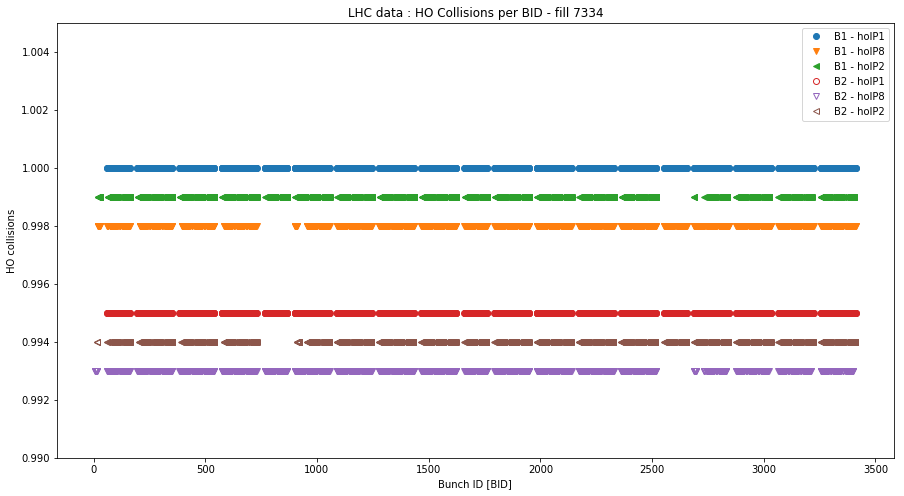

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
_tmp = lrencountersDF[lrencountersDF['beam']=='b1'][['bid','hoip1','hoip8','hoip2']].copy()
_tmp['hoip1s'] = _tmp['hoip1']*1.000
_tmp['hoip2s'] = _tmp['hoip2']*0.999
_tmp['hoip8s'] = _tmp['hoip8']*0.998
_tmp.plot(x='bid',y='hoip1s', label='B1 - hoIP1', marker='o', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip8s', label='B1 - hoIP8', marker='v', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip2s', label='B1 - hoIP2', marker='<', style='o', ax=ax)

_tmp = lrencountersDF[lrencountersDF['beam']=='b2'][['bid','hoip1','hoip8','hoip2']].copy()
_tmp['hoip1s'] = _tmp['hoip1']*0.995
_tmp['hoip2s'] = _tmp['hoip2']*0.994
_tmp['hoip8s'] = _tmp['hoip8']*0.993
_tmp.plot(x='bid',y='hoip1s', label='B2 - hoIP1', marker='o', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip8s', label='B2 - hoIP8', marker='v', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='bid',y='hoip2s', label='B2 - hoIP2', marker='<', fillstyle='none', style='o', ax=ax)

plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LHC data : HO Collisions per BID - fill {}'.format(fno))
plt.legend()

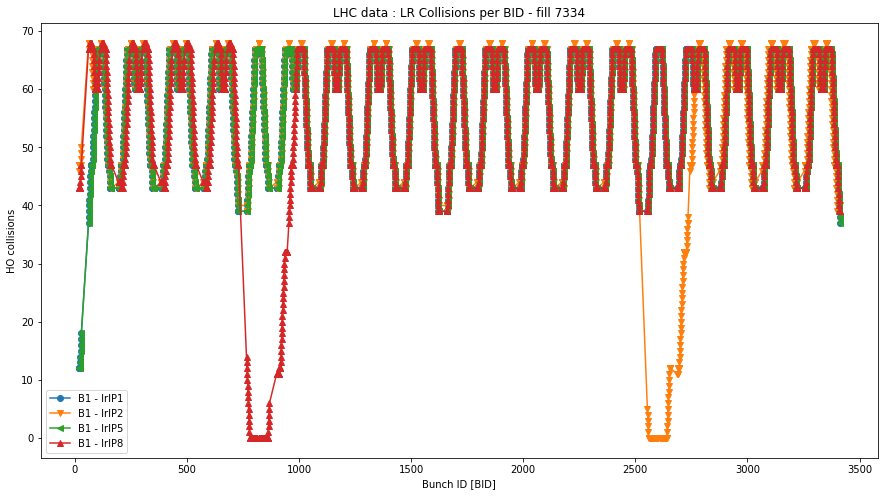

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip1enc_no', label='B1 - lrIP1', marker='o', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip2enc_no', label='B1 - lrIP2', marker='v', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip5enc_no', label='B1 - lrIP5', marker='<', style='-', ax=ax)
lrencountersDF[lrencountersDF['beam']=='b1'].plot(x='bid', y='lrip8enc_no', label='B1 - lrIP8', marker='^', style='-', ax=ax)

# plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LHC data : LR Collisions per BID - fill {}'.format(fno))
plt.legend()

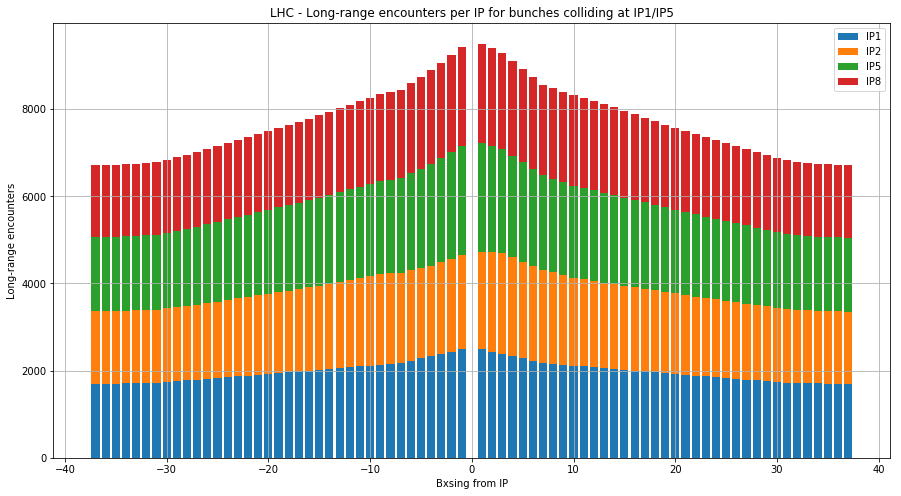

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
dflist = {}
dflist['ipslot'] = np.concatenate(((np.arange(1,nmax)*-1)[::-1], np.arange(1,nmax)))
for ip in ['ip1', 'ip2', 'ip5', 'ip8']:
    lrs = lrencountersDF[(lrencountersDF['beam']=='b1') & (lrencountersDF['hoip1']==1)]['lr'+ip+'enc'].values
    lrtot = sum(lrs)
    dflist['lr'+ip] = lrtot
width = 0.8
p1 = plt.bar(dflist['ipslot'], dflist['lrip1'], width,)
p2 = plt.bar(dflist['ipslot'], dflist['lrip2'], width, bottom=dflist['lrip1'])
p3 = plt.bar(dflist['ipslot'], dflist['lrip5'], width, bottom=dflist['lrip1']+dflist['lrip2'])
p4 = plt.bar(dflist['ipslot'], dflist['lrip8'], width, bottom=dflist['lrip1']+dflist['lrip2']+dflist['lrip5'])

plt.ylabel('Long-range encounters')
plt.xlabel('Bxsing from IP')
plt.title('LHC - Long-range encounters per IP for bunches colliding at IP1/IP5'.format(fno))
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('IP1', 'IP2','IP5','IP8'))
plt.grid()
plt.show()